# Practice Exercise: Scikit-Learn 0
### Introduction to Predictive Modeling with Python and Scikit-Learn

### Objectives

As in the [SK0 Tutorial](https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-0-introduction-to-machine-learning-with-python-and-scikit-learn/), the objective of this practice notebook is to show you a panoramic view of how to build simple machine learning models using the cleaned "income data" from previous data preparation practices using a `holdout` approach. In the previous practices, you cleaned and transformed the raw `income data` and renamed the `income` column as `target` which is defined as:


$$\text{target} = \begin{cases} 1 & \text{ if the income exceeds USD 50,000} \\ 0 & \text{ otherwise }\end{cases}$$

Including `target`, the cleaned data consists of 42 columns and 45,222 rows. Each column is numeric and between 0 and 1.

### Exercise 0: Modeling Preparation

- Read the clean data `us_census_income_data_clean_encoded.csv` available [here](https://github.com/akmand/datasets). 
- Randomly sample 5000 rows as it's too big for a short demo (using a random seed of 999).
- Split the sampled data as 70% training set and the remaining 30% test set using a random seed of 999. 
- Remember to separate `target` during the splitting process. 
- Side question: Why do we need to set a random seed?

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

# so that we can see all the columns
pd.set_option('display.max_columns', None) 

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/us_census_income_data_clean_encoded.csv'
url_content = requests.get(df_url, verify=False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# df = pd.read_csv('us_census_income_data_clean_encoded.csv')

print(df.shape)
df.describe().round(3)

(45222, 42)


,age,education_num,race,gender,hours_per_week,native_country,capital,workclass_federal_gov,workclass_local_gov,workclass_private,workclass_self_emp_inc,workclass_self_emp_not_inc,workclass_state_gov,workclass_without_pay,marital_status_divorced,marital_status_married_af_spouse,marital_status_married_civ_spouse,marital_status_married_spouse_absent,marital_status_never_married,marital_status_separated,marital_status_widowed,occupation_adm_clerical,occupation_armed_forces,occupation_craft_repair,occupation_exec_managerial,occupation_farming_fishing,occupation_handlers_cleaners,occupation_machine_op_inspct,occupation_other_service,occupation_priv_house_serv,occupation_prof_specialty,occupation_protective_serv,occupation_sales,occupation_tech_support,occupation_transport_moving,relationship_husband,relationship_not_in_family,relationship_other_relative,relationship_own_child,relationship_unmarried,relationship_wife,target
count,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.00,45222.000,45222.000,45222.000,45222.000
mean,0.295,0.608,0.860,0.675,0.408,0.913,0.051,0.031,0.069,0.737,0.036,0.084,0.043,0.000,0.139,0.001,0.466,0.012,0.323,0.031,0.028,0.123,0.000,0.133,0.132,0.033,0.045,0.066,0.106,0.005,0.133,0.022,0.120,0.031,0.051,0.413,0.259,0.03,0.147,0.106,0.046,0.248
std,0.181,0.170,0.347,0.468,0.123,0.282,0.072,0.174,0.253,0.441,0.187,0.277,0.203,0.022,0.346,0.027,0.499,0.110,0.468,0.174,0.166,0.328,0.018,0.340,0.339,0.178,0.208,0.248,0.308,0.071,0.339,0.145,0.324,0.174,0.220,0.492,0.438,0.17,0.354,0.308,0.210,0.432
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000
25%,0.151,0.533,1.000,0.000,0.398,1.000,0.042,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000
50%,0.274,0.600,1.000,1.000,0.398,1.000,0.042,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000
75%,0.411,0.800,1.000,1.000,0.449,1.000,0.042,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.00,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000


In [2]:
df_sample = df.sample(n=5000, random_state=999)
df_sample.shape

(5000, 42)

In [3]:
from sklearn.model_selection import train_test_split
target = df_sample.target.values
Data = df_sample.drop(columns = 'target').values
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size=0.3, 
                                                    random_state=999)

In [4]:
print(D_train.shape)
print(D_test.shape)
print(t_train.shape)
print(t_test.shape)

(3500, 41)
(1500, 41)
(3500,)
(1500,)


### Exercise 1

Verify whether training and test sets have similar proportion of target labels. Why is this step important?


In [5]:
sum(t_train==1)/len(t_train)

0.25771428571428573

In [6]:
sum(t_test==1)/len(t_test)

0.25

In [7]:
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size=0.3, 
                                                    random_state=999,
                                                    stratify=target)

In [8]:
sum(t_train==1)/len(t_train)

0.25542857142857145

In [9]:
sum(t_test==1)/len(t_test)

0.25533333333333336

### Exercise 2

- Fit a nearest neighbor (NN) classifier with $k=5$ neighbors using the Euclidean distance. 
- Fit the model on the train data and evaluate its performance on the test data using accuracy.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2)
knn_classifier.fit(D_train, t_train)
knn_classifier.score(D_test, t_test)

0.8133333333333334

In [11]:
pred_test = knn_classifier.predict(D_test)

from sklearn.metrics import accuracy_score
accuracy_score(pred_test, t_test)

0.8133333333333334

### Exercise 3

- Extend the previous question by fitting $k=1, 3, 5, 10, 15, 20$ neighbors using the Manhattan and Euclidean distances respectively. 
- What is the optimal $k$ value for each distance metric? That is, at which $k$, the NN classifier returns the highest accuracy score? **Note:** We will learn later how to perform "grid search" to determine the optimal $k$ in later practices.
- Which distance metric seems to be better? 

In [12]:
k_list = list([1, 3, 5, 10, 15, 20, 25])

knn_score_manhattan = []
knn_score_euclidean = []

for k in k_list:
    knn_classifier_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_classifier_manhattan.fit(D_train, t_train)
    knn_score_manhattan = knn_score_manhattan + [knn_classifier_manhattan.score(D_test, t_test)]
    
    knn_classifier_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_classifier_euclidean.fit(D_train, t_train)
    knn_score_euclidean = knn_score_euclidean + [knn_classifier_euclidean.score(D_test, t_test)]

In [13]:
results = pd.DataFrame({'score_manhattan': knn_score_manhattan, 
                        'score_euclidean': knn_score_euclidean},
                      index = k_list)
results

,score_manhattan,score_euclidean
1,0.771333,0.773333
3,0.805333,0.794667
5,0.816000,0.813333
10,0.820667,0.815333
15,0.824000,0.828000
20,0.829333,0.831333
25,0.829333,0.828000


**Alternative solution + extra**

We might need to visualize to see which combination of hyper-parameters gives us the best performance

In [14]:
results = pd.DataFrame({'manhattan': knn_score_manhattan, 
                        'euclidean': knn_score_euclidean,
                        'k': k_list})
results

,manhattan,euclidean,k
0,0.771333,0.773333,1
1,0.805333,0.794667,3
2,0.816000,0.813333,5
3,0.820667,0.815333,10
4,0.824000,0.828000,15
5,0.829333,0.831333,20
6,0.829333,0.828000,25


In [15]:
plot_results = pd.melt(results,
                       id_vars=['k'], 
                       value_vars=['manhattan', 'euclidean'],
                       value_name='Accuracy',
                       var_name='Distance')
plot_results

,k,Distance,Accuracy
0,1,manhattan,0.771333
1,3,manhattan,0.805333
2,5,manhattan,0.816000
3,10,manhattan,0.820667
4,15,manhattan,0.824000
5,20,manhattan,0.829333
6,25,manhattan,0.829333
7,1,euclidean,0.773333
8,3,euclidean,0.794667
9,5,euclidean,0.813333


In [16]:
plot_results.loc[plot_results['Accuracy'].idxmax(), ]

k                  20
Distance    euclidean
Accuracy     0.831333
Name: 12, dtype: object

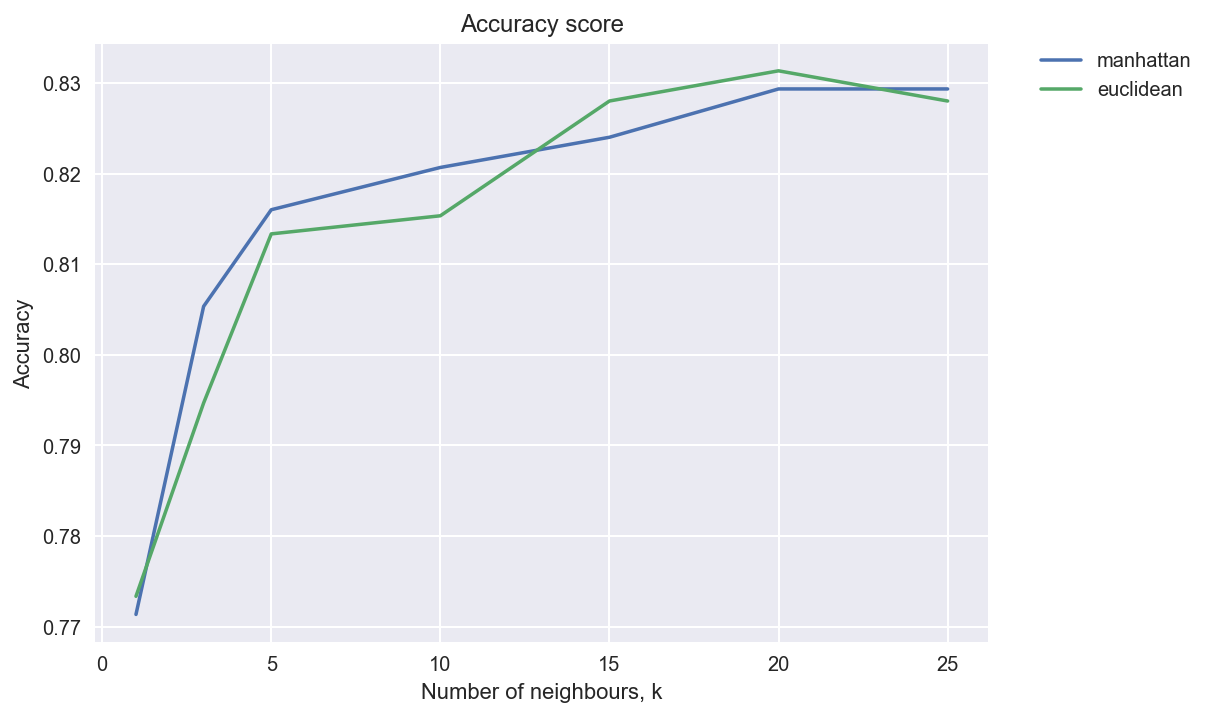

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

import seaborn as sns
fig = sns.lineplot(
    data=plot_results,
    hue='Distance',
    x="k", y="Accuracy"
)
fig.set(title='Accuracy score', xlabel='Number of neighbours, k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

`k=20` and the Manhattan distance yield the highest accuracy. So how can we save this "optimal" KNN model? Three approaches:

1. Refit the classifier with the optimal hyperparameters.
2. We should have "saved" the model in the for-loop above.
3. We can use the `grid-search` method (to be covered in later practices)!

### Exercise 4

- Fit a decision tree classifier with the entropy split criterion and a maximum depth of 5 on the train data, and then evaluate its performance on the test data. 
- Does it perform better than the "best" KNN model from the previous question?

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=999)
dt_classifier.fit(D_train, t_train)
dt_classifier.score(D_test, t_test)

0.84

**Extra**

Let's export the trained decision-tree model into a pickle file.

In [19]:
from pickle import dump, load
filename = 'dt_model.pkl'
dump(dt_classifier, open(filename, 'wb'))

In [20]:
saved_dt_classifier = load(open(filename, 'rb'))

In [21]:
saved_dt_classifier.score(D_test, t_test)

0.84

### Exercise 5

- Fit a random forest classifier with `n_estimators=100` on train data, and then evaluate its performance on the test data. 
- Does it perform better than the decision tree model in the previous question?

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=999)
rf_classifier.fit(D_train, t_train)
rf_classifier.score(D_test, t_test)

0.85

### Exercise 6

Fit a random forest classifier with `n_estimators=250` on train data, and then evaluate its performance on the test data. Does it return a higher accuracy compared to `n_estimators=100`?

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=250, random_state=999)
rf_classifier.fit(D_train, t_train)
rf_classifier.score(D_test, t_test)

0.8486666666666667

###  Exercise 7

Fit to a Gaussian naive Bayes classifier with a variance smoothing value of $10^{-2}$.

In [24]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB(var_smoothing=10**(-2))
nb_classifier.fit(D_train, t_train)
nb_classifier.score(D_test, t_test)

0.766

### Exercise 8

Fit to a support vector machine with default values.

In [25]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(D_train, t_train)
svm_classifier.score(D_test, t_test)

0.822

### Exercise 9

Predict the first three observations of the full cleaned data using the support vector machine built in the previous question.

In [26]:
new_obs = Data[0:3]
svm_classifier.predict(new_obs)

array([0, 0, 0], dtype=int64)

### Exercise 10

Use `Pandas` to create a confusion matrix for the SVM model.<br>
**Hint:** Use pd.crosstab(). <br>
**Note:** We will learn how to use other performance evaluation measures using `Scikit-Learn` in upcoming practices.

In [27]:
predictions = svm_classifier.predict(D_test)

In [28]:
confusion_matrix2 = pd.crosstab(t_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [29]:
confusion_matrix2

Predicted,0,1,All
Actual,,,
0,1016,101,1117
1,166,217,383
All,1182,318,1500


**Alternative solution**

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(t_test, predictions)

array([[1016,  101],
       [ 166,  217]], dtype=int64)

### Exercise 11

- Which cells in the confusion matrix correspond to `TP` and `TN`? 
- Calculate
> - Accuracy rate
> - Error rate
> - Precision (across the "1" column)
> - Recall (across the "1" row)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(t_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1117
           1       0.68      0.57      0.62       383

    accuracy                           0.82      1500
   macro avg       0.77      0.74      0.75      1500
weighted avg       0.81      0.82      0.82      1500



***
www.featureranking.com